**Install package JCOPML**

In [2]:
!pip install jcopml


     |████████████████████████████████| 102kB 4.9MB/s 
  Created wheel for jcopml: filename=jcopml-1.1.10-py2.py3-none-any.whl size=33230 sha256=227afedd1c2069ab704cff173505682d85afb12f979ea6faf3edc210a7f5fe35
  Stored in directory: /root/.cache/pip/wheels/82/22/ce/b8b4c3400f788e5050b5b4b4d988884b8ec72b6b8751693914
Successfully built jcopml


**Import Common Package**

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

**Import Dataset Using Pandas**

In [4]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Shape Of Dataset Heart Failure**

In [6]:
df.shape

(299, 13)

**Plot Missing Value**

,missing_value,%
age,0,0.0
anaemia,0,0.0
creatinine_phosphokinase,0,0.0
diabetes,0,0.0
ejection_fraction,0,0.0
high_blood_pressure,0,0.0
platelets,0,0.0
serum_creatinine,0,0.0
serum_sodium,0,0.0
sex,0,0.0


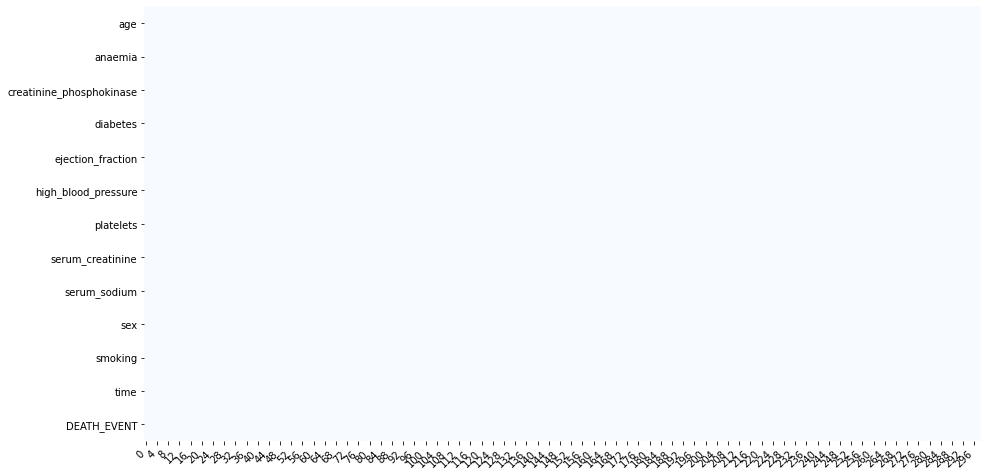

In [11]:
plot_missing_value(df , return_df = True)

**Dataset Columns**

In [12]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

**Split Training and Testing Dataset**

In [13]:
X = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((209, 12), (90, 12), (209,), (90,))

In [14]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Value Counts Feature Target Prediction (DEATH_EVENT)**

In [15]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

**Categoric Plotting Features**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

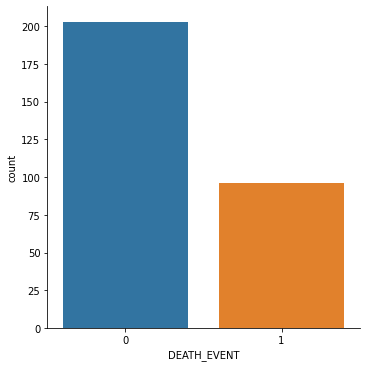

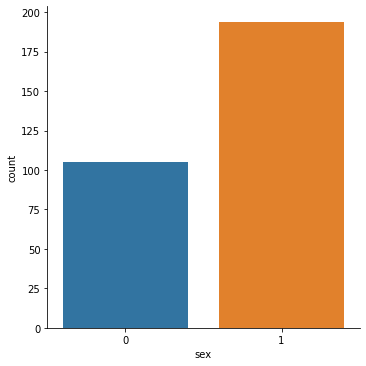

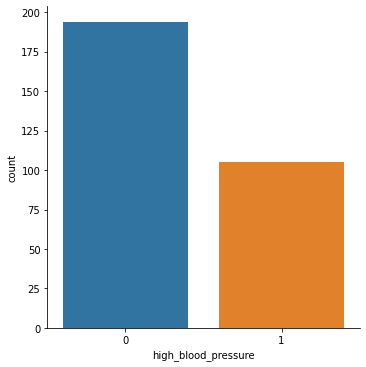

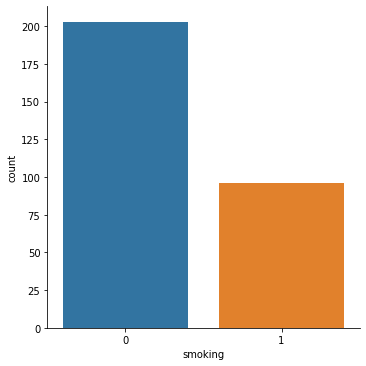

In [53]:
features_catplot = ['DEATH_EVENT', 'sex', 'high_blood_pressure','smoking']
for feature in features_catplot :
    sns.catplot(feature, data=df, kind="count", height=5)
    i+=1

**Distplot Correlation DEATH_EVENT Feature Target Prediction**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

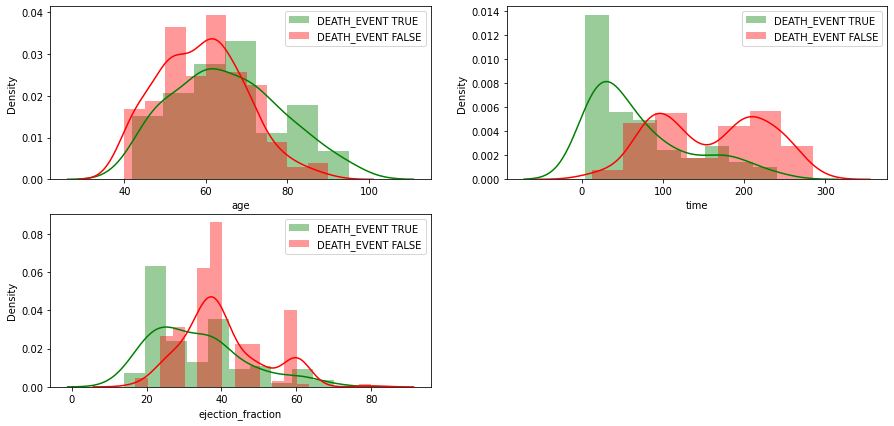

In [54]:
plt.figure(figsize=(15, 7))
features = ['age' , 'time', 'ejection_fraction']
i = 0
for feature in features:
    plt.subplot(2,2,1+i)
    sns.distplot(df[df['DEATH_EVENT'] == 1][feature], color='green',label='DEATH_EVENT TRUE')
    sns.distplot(df[df['DEATH_EVENT'] == 0][feature], color='red', label='DEATH_EVENT FALSE')
    i +=1
    plt.legend()

**COUNTPLOT DEATH_EVENT And Other Features**

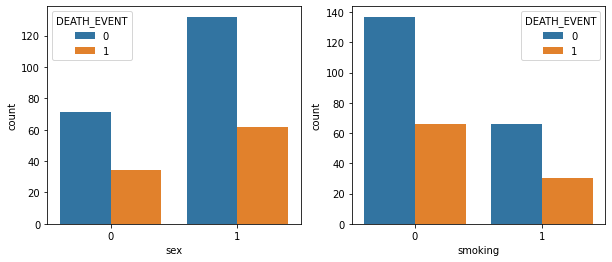

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(x='sex', data=df, hue='DEATH_EVENT', ax=ax[0])
sns.countplot(x='smoking', data=df, hue='DEATH_EVENT', ax=ax[1])


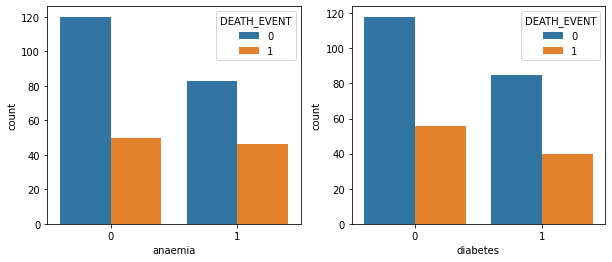

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(x='anaemia', data=df, hue='DEATH_EVENT', ax=ax[0])
sns.countplot(x='diabetes', data=df, hue='DEATH_EVENT', ax=ax[1])


**Correlation Heatmap**

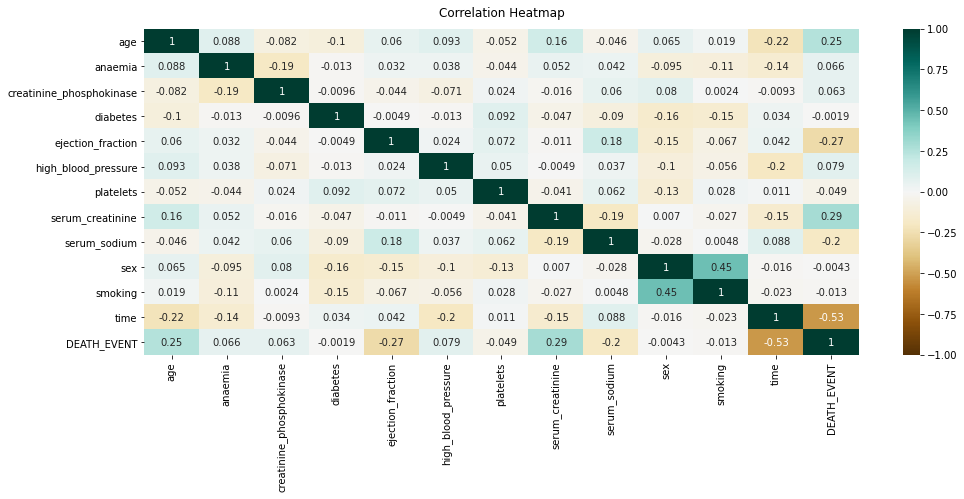

In [74]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Preprocessing ColumnTransorformer ScikitLearn**

In [75]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), ['age','creatinine_phosphokinase','platelets',
       'serum_creatinine','serum_sodium']),
    ('categoric', cat_pipe(encoder='onehot'), ['anaemia', 'diabetes','high_blood_pressure', 'sex', 'smoking', 'time' ]),
])

In [76]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])

In [77]:
from jcopml.tuning.space import Real , Integer
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp
from array import array
from sklearn.model_selection import GridSearchCV

**Fitting Model Using Logistic Regression and RandomizedSearchCV HyperParameter Tuning**

In [80]:
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

model = RandomizedSearchCV(pipeline ,rsp.logreg_params ,cv=2, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'algo__C': 47.20097939466598, 'algo__fit_intercept': False}
0.9904306220095693 0.7751373626373627 0.7444444444444445


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.3s finished


**Model best Score**

In [83]:
print(model.best_params_)

{'algo__C': 47.20097939466598, 'algo__fit_intercept': False}


**Model Score Training**

In [84]:
print(model.score(X_train, y_train))

0.9904306220095693


**Model Score Testing**

In [85]:
print(model.score(X_test, y_test))

0.7444444444444445


**Feature Importance**

In [81]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

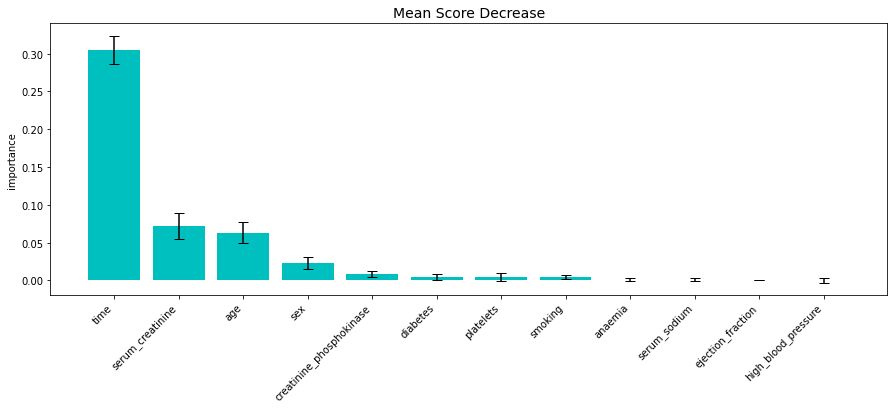

In [82]:
df_imp = mean_score_decrease(X_train , y_train , model , plot=True)